In [23]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("TrainData.csv")

data.head()

# Split the 'Architectural Elements' column into individual elements and create dummy variables
architectural_elements = data['Architectural Elements'].str.get_dummies(sep=', ')

# Combine the dummy variables with the original dataset
processed_data = pd.concat([data, architectural_elements], axis=1)

processed_data = processed_data.drop(columns=["Architectural Elements","Floor Plan"])

# Display the updated dataset
processed_data.head()

# Convert column names to caps
processed_data.columns = [col.upper() for col in processed_data.columns]

processed_data.to_csv("Processedata.csv",index=False)



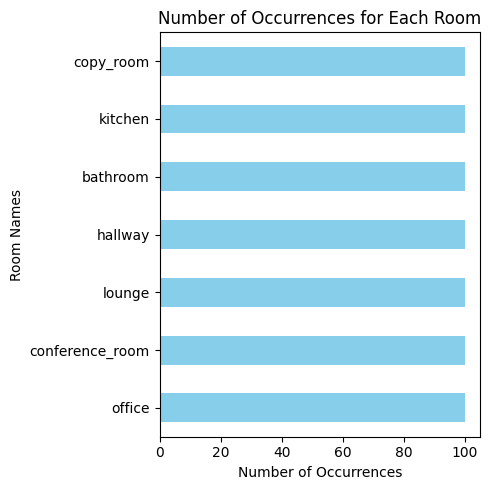

In [24]:
import matplotlib.pyplot as plt
plansCounts = data["Room Name"].value_counts()

plt.figure(figsize=(5, 5))
plansCounts.plot(kind='barh', color='skyblue')
plt.title('Number of Occurrences for Each Room')
plt.xlabel('Number of Occurrences')
plt.ylabel('Room Names')
plt.tight_layout()  
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
# Encoding labels

X = processed_data.drop(columns=["ROOM NAME"])

X.head()

y = processed_data["ROOM NAME"]
list(set(y))

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(processed_data["ROOM NAME"])


In [26]:
processed_data


,ROOM NAME,BOARD,CABINET,CHAIR,CLUTTER,COUNTERTOP,LAMP,MICROWAVE,PAPER,REFRIGERATOR,SINK,SOFA,TV/MONITOR,TABLE,TRASH CAN,WINDOW
0,office,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1
1,conference_room,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,lounge,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1
3,hallway,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,bathroom,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,lounge,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1
696,hallway,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
697,bathroom,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1
698,kitchen,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5)

model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [28]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
class_name = label_encoder.classes_
report = classification_report(y_test,y_pred,target_names=class_name)
print(report)

                 precision    recall  f1-score   support

       bathroom       1.00      1.00      1.00        26
conference_room       0.92      0.92      0.92        12
      copy_room       1.00      1.00      1.00        23
        hallway       1.00      1.00      1.00        17
        kitchen       1.00      1.00      1.00        14
         lounge       0.89      1.00      0.94        25
         office       0.95      0.83      0.88        23

       accuracy                           0.96       140
      macro avg       0.97      0.96      0.96       140
   weighted avg       0.97      0.96      0.96       140



In [89]:
def classify(file_path, model,label_encoder):
    """
    Classify an entire file as a single label based on its content.

    Parameters:
        file_path (str): Path to the CSV file containing test data.
        model (sklearn model): Trained classification model.
        feature_columns (list of str): Feature columns from the training dataset.

    Returns:
        str: Predicted class label for the file.
    """
    import pandas as pd
    
    # Load the test data
    test_data = pd.read_csv(file_path)


    feature_columns = ["BOARD","CABINET","CHAIR","CLUTTER","COUNTERTOP","LAMP","MICROWAVE","PAPER","REFRIGERATOR","SINK","SOFA","TV/MONITOR","TABLE","TRASH CAN","WINDOW"]

    # Extract and process architectural elements
    elements = test_data.iloc[:, 0].str.upper().tolist()

    # Initialize a feature vector with zeros
    test_instance = {feature: 0 for feature in feature_columns}
    

    # Populate the feature vector
    for feature in feature_columns:
        # Special handling for "TV/MONITOR"
        if feature == "TV/MONITOR" and ('TV' in elements or 'MONITOR' in elements):
            test_instance[feature] = 1
        elif feature.upper() in elements:
            test_instance[feature] = 1

    # Convert to a DataFrame
    processed_data = pd.DataFrame([test_instance])
    


    # Use the model to predict the label
    prediction = model.predict(processed_data)



    return label_encoder.inverse_transform(prediction)




     
     

         True_Label         Prediction
0            office           [lounge]
1            office  [conference_room]
2            office  [conference_room]
3           hallway           [lounge]
4            office  [conference_room]
5            office  [conference_room]
6           hallway          [hallway]
7            office  [conference_room]
8            office  [conference_room]
9            office           [lounge]
10           office  [conference_room]
11           office  [conference_room]
12           office  [conference_room]
13           office  [conference_room]
14           office           [office]
15           office  [conference_room]
16           office  [conference_room]
17           office  [conference_room]
18           office  [conference_room]
19           office  [conference_room]
20           office  [conference_room]
21           office  [conference_room]
22           office  [conference_room]
23           office  [conference_room]
24           office      

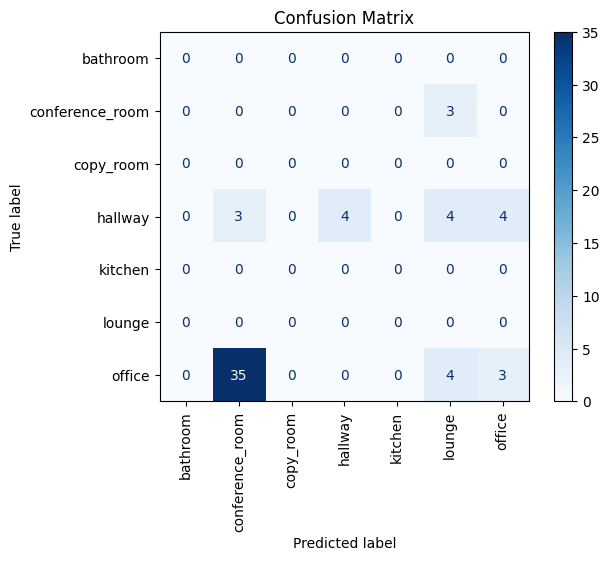

Classification Report:
                 precision    recall  f1-score   support

       bathroom       0.00      0.00      0.00         0
conference_room       0.00      0.00      0.00         3
      copy_room       0.00      0.00      0.00         0
        hallway       1.00      0.27      0.42        15
        kitchen       0.00      0.00      0.00         0
         lounge       0.00      0.00      0.00         0
         office       0.43      0.07      0.12        42

       accuracy                           0.12        60
      macro avg       0.20      0.05      0.08        60
   weighted avg       0.55      0.12      0.19        60



In [94]:
import os 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support,ConfusionMatrixDisplay


directory = "csv_predictedlabel"
true_labels = []
predictions = []

for file_name in os.listdir(directory):
    if file_name.endswith(".csv"):
        # Get the true label from the file name
        true_label = file_name.split('_')[0]
        file_path = os.path.join(directory, file_name)

        # Predict the label
        predicted_label = classify(file_path, model, label_encoder)

        # Append to lists
        if true_label == "conferenceRoom":
            true_label = "conference_room"
        true_label = true_label.lower() 
        true_labels.append(true_label)
        
        predictions.append(predicted_label)

df = pd.DataFrame({
        'True_Label': true_labels,
        'Prediction': predictions
    })

print(df)






# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions, labels=label_encoder.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation="vertical")
plt.title("Confusion Matrix")
plt.show()


report = classification_report(true_labels, predictions, target_names=label_encoder.classes_,labels=label_encoder.classes_,zero_division=False)
print("Classification Report:")
print(report)